# 1. Importar Librerías

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Cargar Datos

In [164]:
df_ventas = pd.read_csv('./DATASET.txt')

# 3. Manipulación de Datos

In [165]:
df_ventas.head(4)

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44


In [166]:
df_ventas.shape

(150150, 5)

*1. Hay 150150 ventas y 5 características.*

In [167]:
df_ventas.dtypes

ID               int64
Store ID         int64
Total Price    float64
Base Price     float64
Units Sold       int64
dtype: object

In [168]:
df_ventas.columns

Index(['ID', 'Store ID', 'Total Price', 'Base Price', 'Units Sold'], dtype='object')

In [169]:
df_ventas.apply(lambda x: x.nunique())

ID             150150
Store ID           76
Total Price       646
Base Price        572
Units Sold        708
dtype: int64

In [170]:
# Colocar la columna id de la venta como indice.
df_ventas.set_index('ID', inplace= True)

# 4. Entendimiento de los Datos

In [171]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150150 entries, 1 to 212644
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Store ID     150150 non-null  int64  
 1   Total Price  150149 non-null  float64
 2   Base Price   150150 non-null  float64
 3   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 5.7 MB


In [172]:
# Calcular cuantos valores nulos hay por cada columna.
df_ventas.isnull().sum()

Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

*2. La columna Total Price tiene 1 registro nulo.*

In [173]:
import missingno as msno

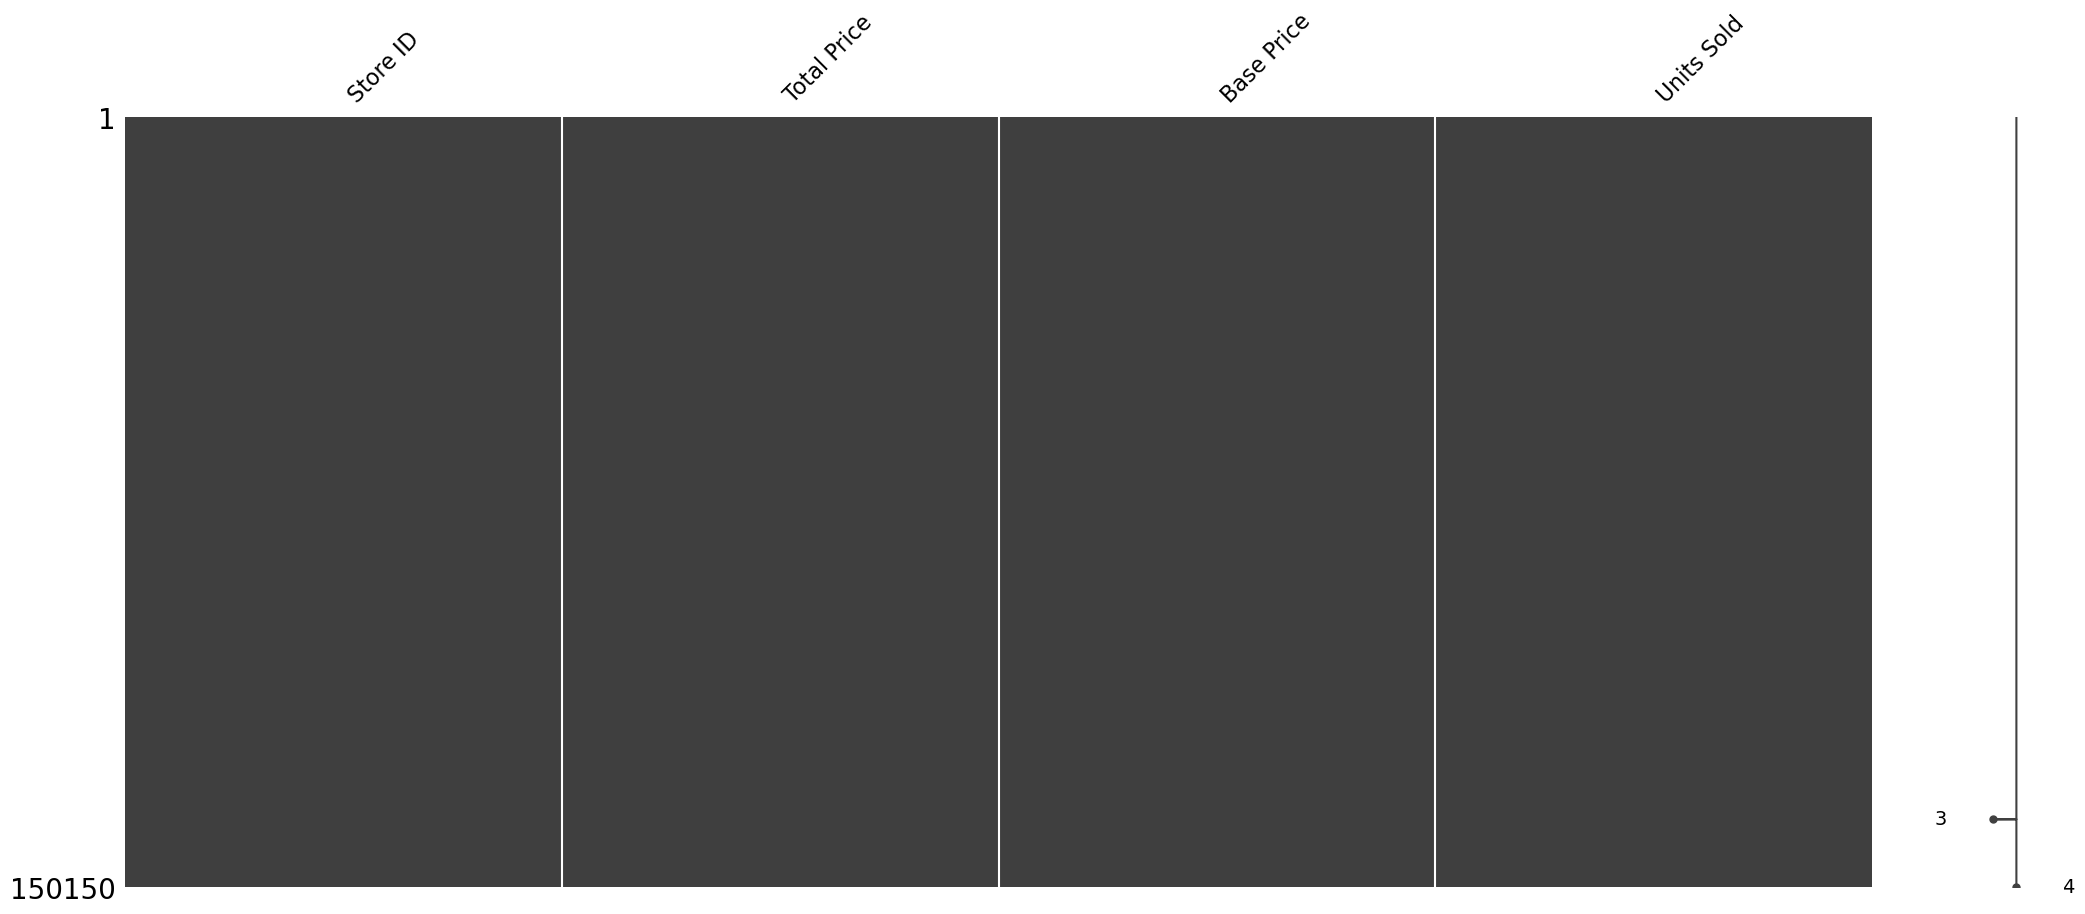

In [174]:
# Analizar los valores nulos en una gráfica.
msno.matrix(df_ventas)
plt.show()

*3. La variable Total Price tiene un registro nulo que se puede inputar (eliminarlo o reemplazarlo por la media) ya que no afecta porque es un solo registro.*

## 2.1. Variables Cuantitativas

In [175]:
# Se observa que todos las columnas son númericas.
df_atributos_numericos = df_ventas[df_ventas.columns]

In [176]:
# Calcular las primeras variables estadísticas.
df_atributos_numericos.describe()

,Store ID,Total Price,Base Price,Units Sold
count,150150.000000,150149.000000,150150.000000,150150.000000
mean,9199.422511,206.626751,219.425927,51.674206
std,615.591445,103.308516,110.961712,60.207904
min,8023.000000,41.325000,61.275000,1.000000
25%,8562.000000,130.387500,133.237500,20.000000
50%,9371.000000,198.075000,205.912500,35.000000
75%,9731.000000,233.700000,234.412500,62.000000
max,9984.000000,562.162500,562.162500,2876.000000


*3.*
- De la varaibles Total Price y Base Price, el promedio es mayor que la desviación estándar por lo que no existen valores atipicos extremos.
  (OJO: Igual hay que tomar en cuenta ya que se observa hay una diferencia considerable entre el tercer cuartil (75%) y el valor máximo).
- De la variable Units Sold, el primedio es menor que la desviación estándar por lo que existen valores atípicos.

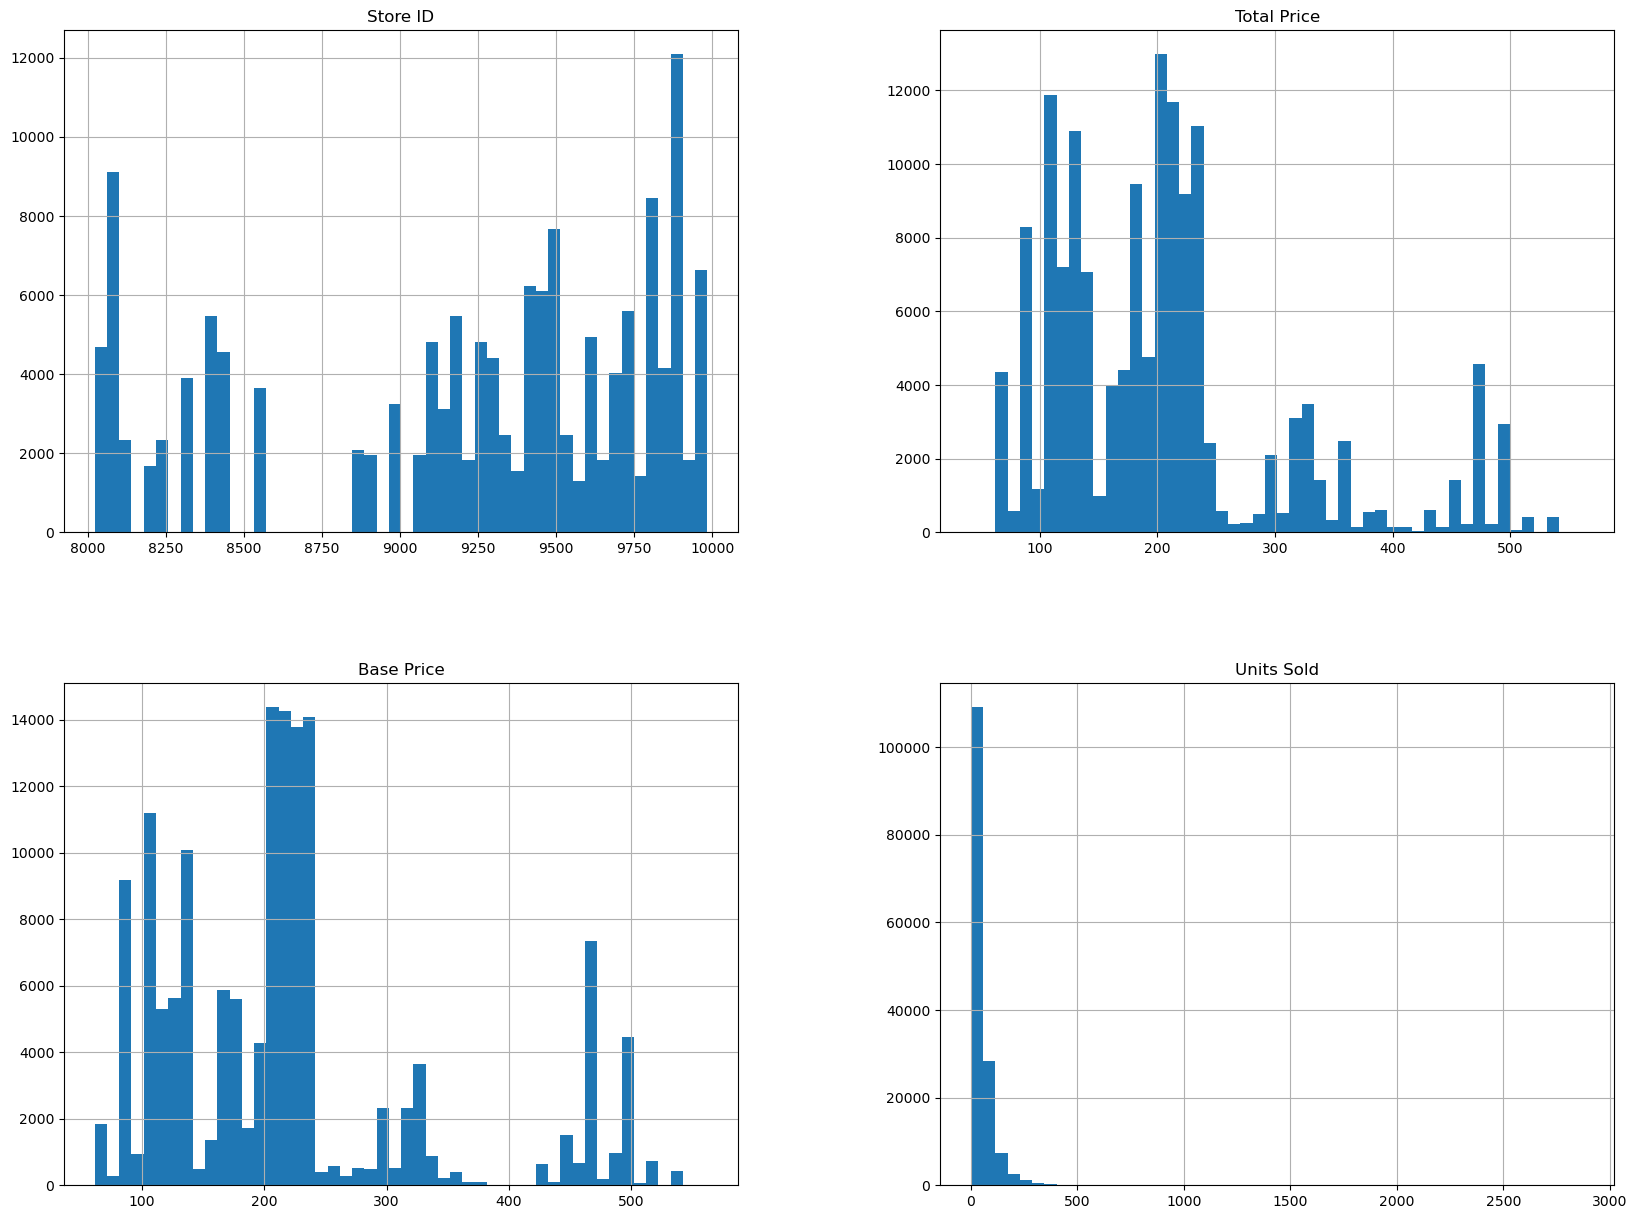

In [177]:
# Calcular la distribución de las variables numéricas.
df_atributos_numericos.hist(bins= 50, figsize= (20,15))
plt.show()

<Axes: >

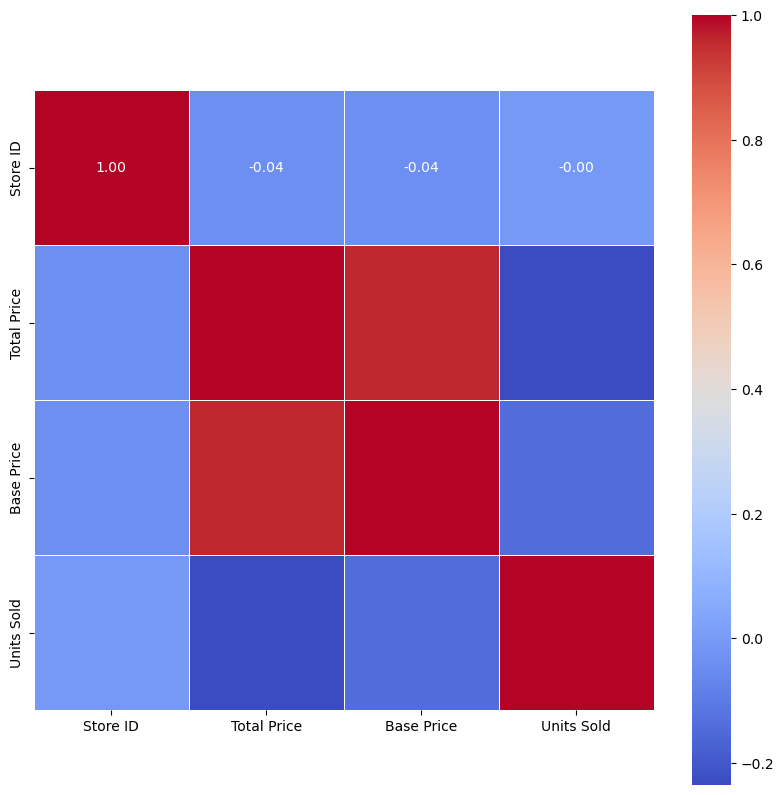

In [178]:
corr = df_atributos_numericos.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True, linewidths=0.5)

*4. Las variables que tienen mayor correlación positiva (+) es Total Price y Base Price y correlación negativa (-) es Total Price y Units Sold.*

# 5. Tratamiento de Datos

## 5.1 Aplicar un Cambio de Distribución de la Variable Numérica para Reducir los Outliers Extremos

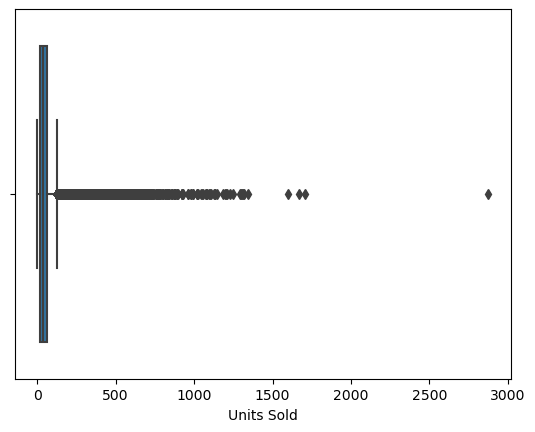

In [179]:
# Units Sold
sns.boxplot(x= df_atributos_numericos['Units Sold'])
plt.show()

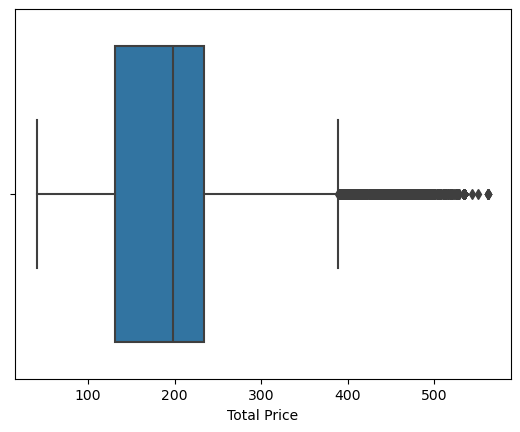

In [180]:
sns.boxplot(x= df_atributos_numericos['Total Price'])
plt.show()

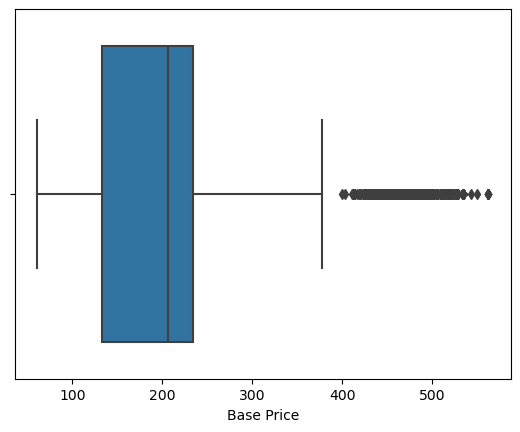

In [181]:
sns.boxplot(x= df_atributos_numericos['Base Price'])
plt.show()

In [182]:
df_atributos_numericos['Units Sold'].describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: Units Sold, dtype: float64

In [183]:
def limitar_valores_atipicos(x):
    x = x.clip(upper= x.quantile(0.95))
    return (x)

In [184]:
df_tratamiento_units_sold = df_atributos_numericos[['Units Sold', 'Total Price', 'Base Price']].apply(lambda x: limitar_valores_atipicos(x))

In [185]:
df_atributos_numericos = pd.concat([df_atributos_numericos.drop(columns= ['Units Sold', 'Total Price', 'Base Price']), df_tratamiento_units_sold], axis= 1)

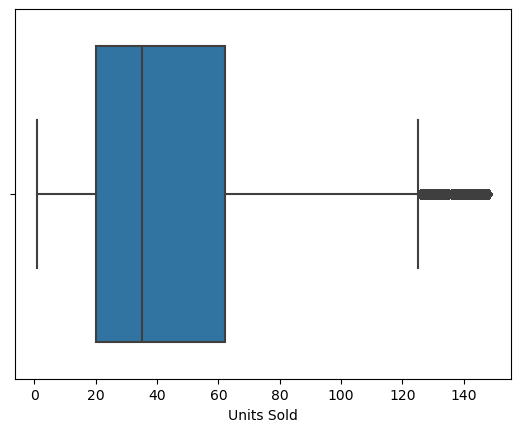

In [186]:
# Units Sold Sold aplicando el topeo al percentel
sns.boxplot(x= df_atributos_numericos['Units Sold'])
plt.show()

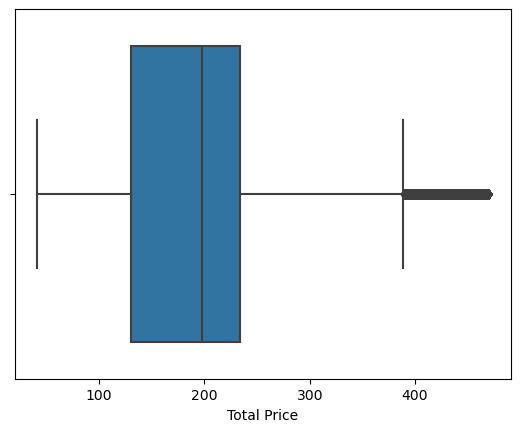

In [187]:
# Total Price aplicando el topeo al percentel
sns.boxplot(x= df_atributos_numericos['Total Price'])
plt.show()

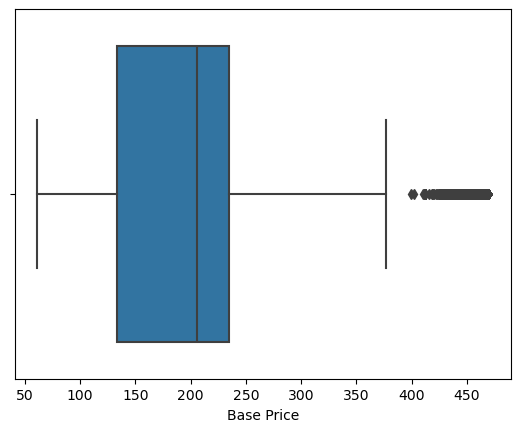

In [188]:
# Base Price Sold aplicando el topeo al percentel
sns.boxplot(x= df_atributos_numericos['Base Price'])
plt.show()

In [189]:
df_atributos_numericos.describe()

,Store ID,Units Sold,Total Price,Base Price
count,150150.000000,150150.000000,150149.000000,150150.000000
mean,9199.422511,47.031202,205.721863,218.036166
std,615.591445,37.740707,100.805956,107.547758
min,8023.000000,1.000000,41.325000,61.275000
25%,8562.000000,20.000000,130.387500,133.237500
50%,9371.000000,35.000000,198.075000,205.912500
75%,9731.000000,62.000000,233.700000,234.412500
max,9984.000000,148.000000,469.537500,469.537500


## 5.2. Imputar los valores nulos

In [190]:
df_atributos_numericos['Total Price'].describe()

count    150149.000000
mean        205.721863
std         100.805956
min          41.325000
25%         130.387500
50%         198.075000
75%         233.700000
max         469.537500
Name: Total Price, dtype: float64

In [191]:
# En este caso vamos a reemplazar por la media.
df_atributos_numericos['Total Price'] = df_atributos_numericos['Total Price'].fillna(205.721863)

In [192]:
df_data_limpia = df_atributos_numericos

# 6. Modelado No Supervisado

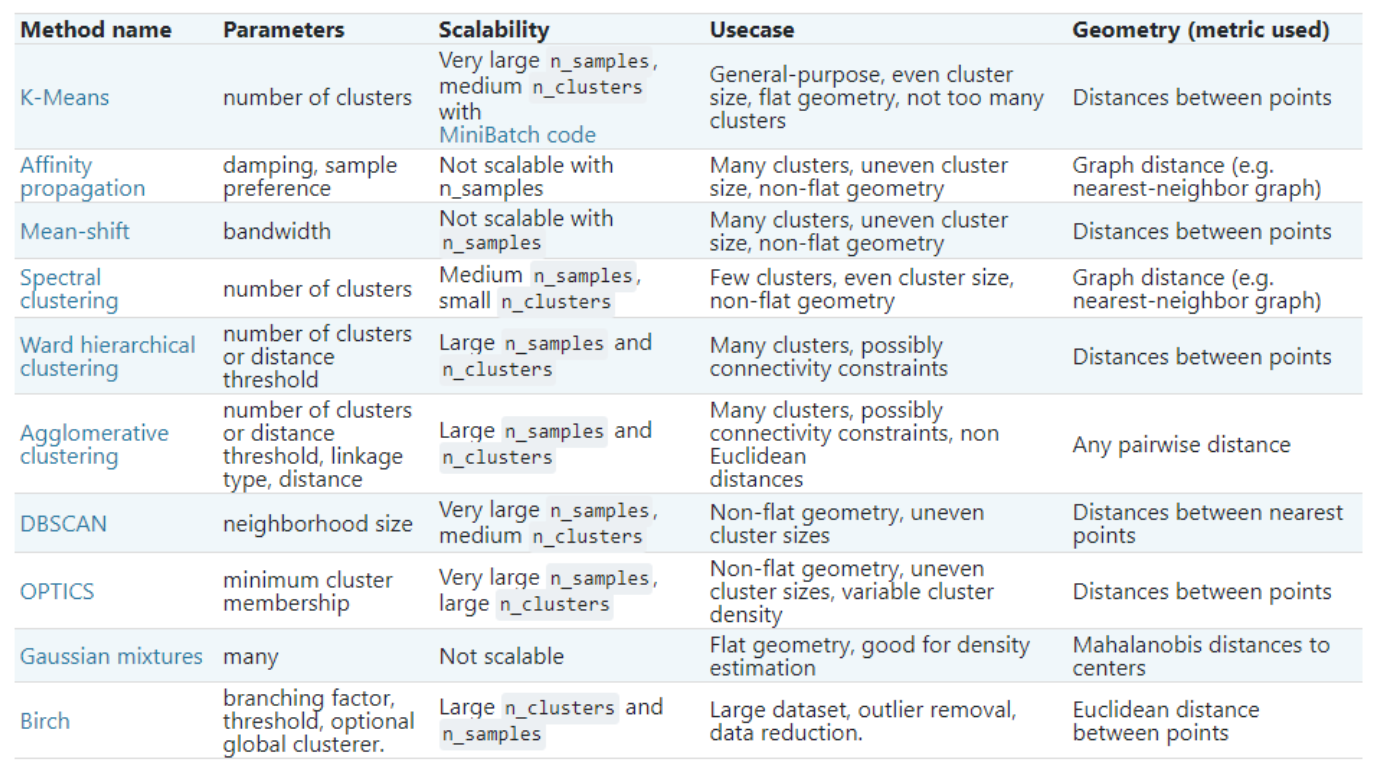

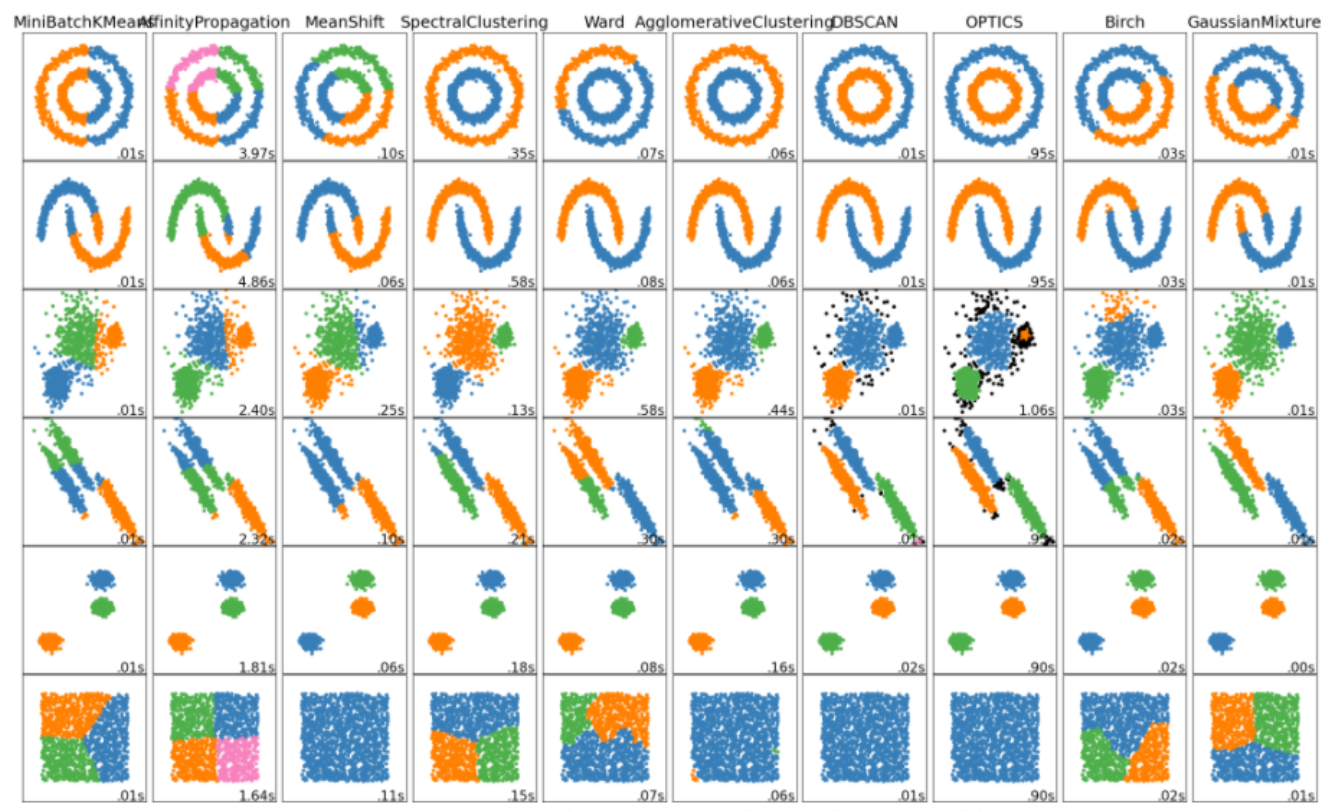

In [193]:
from sklearn.cluster import KMeans

In [194]:
inertias = []
n_clusters = range(1, 10)
for n in n_clusters:
    print(f"Evaluando n_clusters = {n}")
    knn_model = KMeans(n_clusters= n)
    knn_model.fit(df_data_limpia)
    inertias.append(knn_model.inertia_)

Evaluando n_clusters = 1
Evaluando n_clusters = 2


c:\Users\MARTIN\anaconda3\envs\python_for_analitycs\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MARTIN\anaconda3\envs\python_for_analitycs\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Evaluando n_clusters = 3


c:\Users\MARTIN\anaconda3\envs\python_for_analitycs\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Evaluando n_clusters = 4


c:\Users\MARTIN\anaconda3\envs\python_for_analitycs\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Evaluando n_clusters = 5


c:\Users\MARTIN\anaconda3\envs\python_for_analitycs\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Evaluando n_clusters = 6


c:\Users\MARTIN\anaconda3\envs\python_for_analitycs\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Evaluando n_clusters = 7


c:\Users\MARTIN\anaconda3\envs\python_for_analitycs\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Evaluando n_clusters = 8


c:\Users\MARTIN\anaconda3\envs\python_for_analitycs\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Evaluando n_clusters = 9


c:\Users\MARTIN\anaconda3\envs\python_for_analitycs\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [195]:
inertias

[60375735870.76024,
 15093291623.444221,
 7347046094.028248,
 5702423437.874222,
 4761204735.210222,
 3891548322.060424,
 3349725914.4466286,
 2860173831.4292593,
 2507118533.133058]

### 6.1. El Método del Codo
Este método permite comparar los valores de inercia obtenidos tras aplicar K-means a diferente número de clústeres, representando en una gráfica la inercia respecto del número de clústeres. La idea detrás de este método se basa en que, en cierto punto, se suele producir un cambio brusco en la evolución de la inercia, y por tanto la línea toma una forma parecida a la de un brazo y su codo. Ese punto indica el número óptimo de clústeres a escoger para el conjunto de datos dado, es decir, el "codo" corresponde al número óptimo de clústeres.

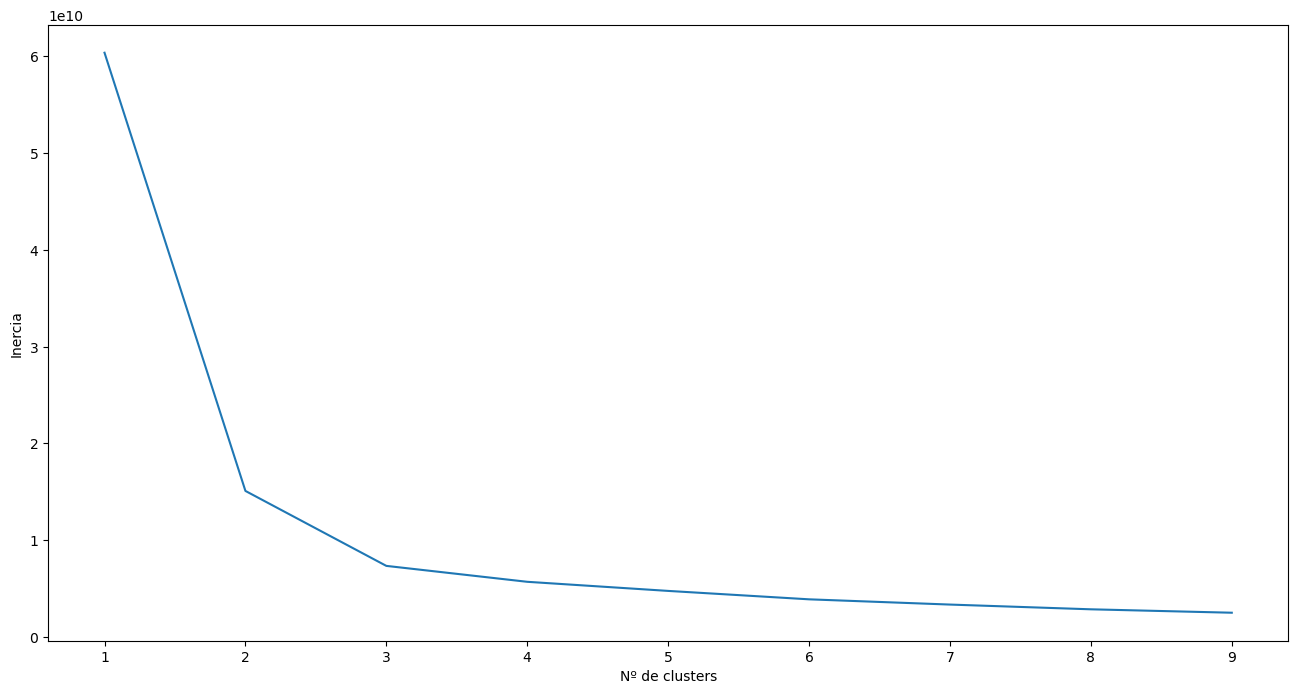

In [196]:
plt.figure(figsize=(16,8))
plt.plot(n_clusters, inertias)
plt.xlabel("Nº de clusters")
plt.ylabel("Inercia")
plt.show()

In [197]:
knn_final = KMeans(n_clusters= 3)
knn_final.fit(df_data_limpia)

c:\Users\MARTIN\anaconda3\envs\python_for_analitycs\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [198]:
df_data_limpia["cluster_id"] = knn_final.predict(df_data_limpia)
df_data_limpia

,Store ID,Units Sold,Total Price,Base Price,cluster_id
ID,,,,,
1,8091,20,99.0375,111.8625,0
2,8091,28,99.0375,99.0375,0
3,8091,19,133.9500,133.9500,0
4,8091,44,133.9500,133.9500,0
5,8091,52,141.0750,141.0750,0
...,...,...,...,...,...
212638,9984,38,235.8375,235.8375,1
212639,9984,30,235.8375,235.8375,1
212642,9984,31,357.6750,469.5375,1


In [201]:
# Generamos una muestra elaoatoria de 150 registros de los datos limpios.
df_samples = df_data_limpia.sample(150)

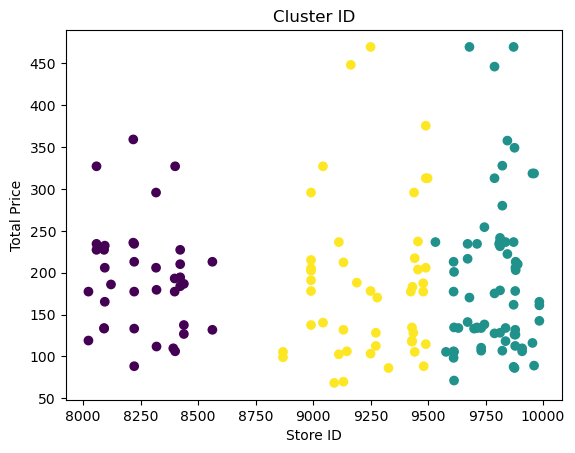

In [203]:
plt.scatter(df_samples['Store ID'], df_samples['Total Price'], c= df_samples['cluster_id'])
plt.title("Cluster ID")
plt.xlabel("Store ID")
plt.ylabel("Total Price")

plt.show()